In [2]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json
from scipy.stats import rankdata

import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore', 'use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.')


In [3]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [4]:
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [107]:
run_i = 0
mcm_index = 3
cat_a = mcm_index
cat_b = 5# other digit

# highest log-evidence (most closest to 0, highest compression)
# Digit 3 i=0
# Digit 5 i=28
# Digit 0 i=36
# Digit 1 i=37
samples_path = "../data/OUTPUT/mcm/sample_sizes"
mcms_fname = f"MCMs_{run_i}.json"# 0 is run index
counts_fname = f"Counts_{run_i}.json"
n_samples = 5423

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f)


In [108]:
# n_variables = 121 #TODO This cell is not trash. Needed if use all samples in a folder (e.g., 5423 or test)
# data_path = "../data/INPUT_all/data/"
# data_filename_format = "train-images-unlabeled-{}.dat"
# seed_run = run_i

# # # # for all train images in all categories, get the PDF of that all ICC of one MCM fitted to one image
# all_C_icc = myplot.calculate_P_icc_train(C, all_MCM,mcm_index,n_variables, data_path,data_filename_format,seed_run,n_samples)
# np.save(f"../data/OUTPUT/mcm/sample_sizes/{n_samples}/all_C_icc_{mcm_index}_run_{run_i}.npy", all_C_icc)



In [109]:
# all_C_icc = np.load(f"../data/OUTPUT/mcm/sample_sizes/{1000}/all_C_icc_{mcm_index}_run_{run_i}.npy")
# assert all_C_icc.shape[1] ==n_samples, f"{all_C_icc.shape}"

In [110]:
# Skip community structure calculation. #TODO This cell is not trash.

# # mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
# # mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

# scale = 2
# fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
# axs = axs.flatten()
# for i, ax in enumerate(axs): 
#     comms = myplot.generate_icc_comms_map(all_MCM[i])
    # myplot.plot_communities(ax, comms, myplot.int_to_letters(comms),f"MCM {i}")
# # myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

# plt.tight_layout()
# plt.savefig("../figures/paper_comms.png",dpi=300, bbox_inches="tight")
# plt.close()

--------------------------

Scatter plot in how % correct vote for iccs (points) for seeing a 3 vs a 5

In [111]:
# generate test counts
n_variables = 121
test_data_path = "../data/INPUT_all/data/testdata_separated"
test_data_filename_format = "test-images-unlabeled-{}.dat"
test_all_C_icc = myplot.calculate_P_icc(C, all_MCM,mcm_index,n_variables, test_data_path,test_data_filename_format)


In [112]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [113]:
# comms = myplot.generate_icc_comms_map(all_MCM[mcm_index])
# # avg_prob.shape
# # avg_prob
# icc_idx, icc_size = np.unique(comms, return_counts=True)
# res = (avg_prob.T ** (1/icc_size)).T
# avg_prob

def adjust_prob_icc_size(comms, avg_prob): 
    # Adjust ICC probability by doing probabilities ^ 1/r

    icc_idx, icc_size = np.unique(comms, return_counts=True)
    return (avg_prob.T ** (1/icc_size)).T



In [102]:
# distances = utils.normalised_signed_distance_decisionbound(adjust_prob_icc_size(comms,avg_prob), cat_a, cat_b)
# distances_b = utils.normalised_signed_distance_decisionbound(avg_prob, cat_a, cat_b)

# distances, distances_b

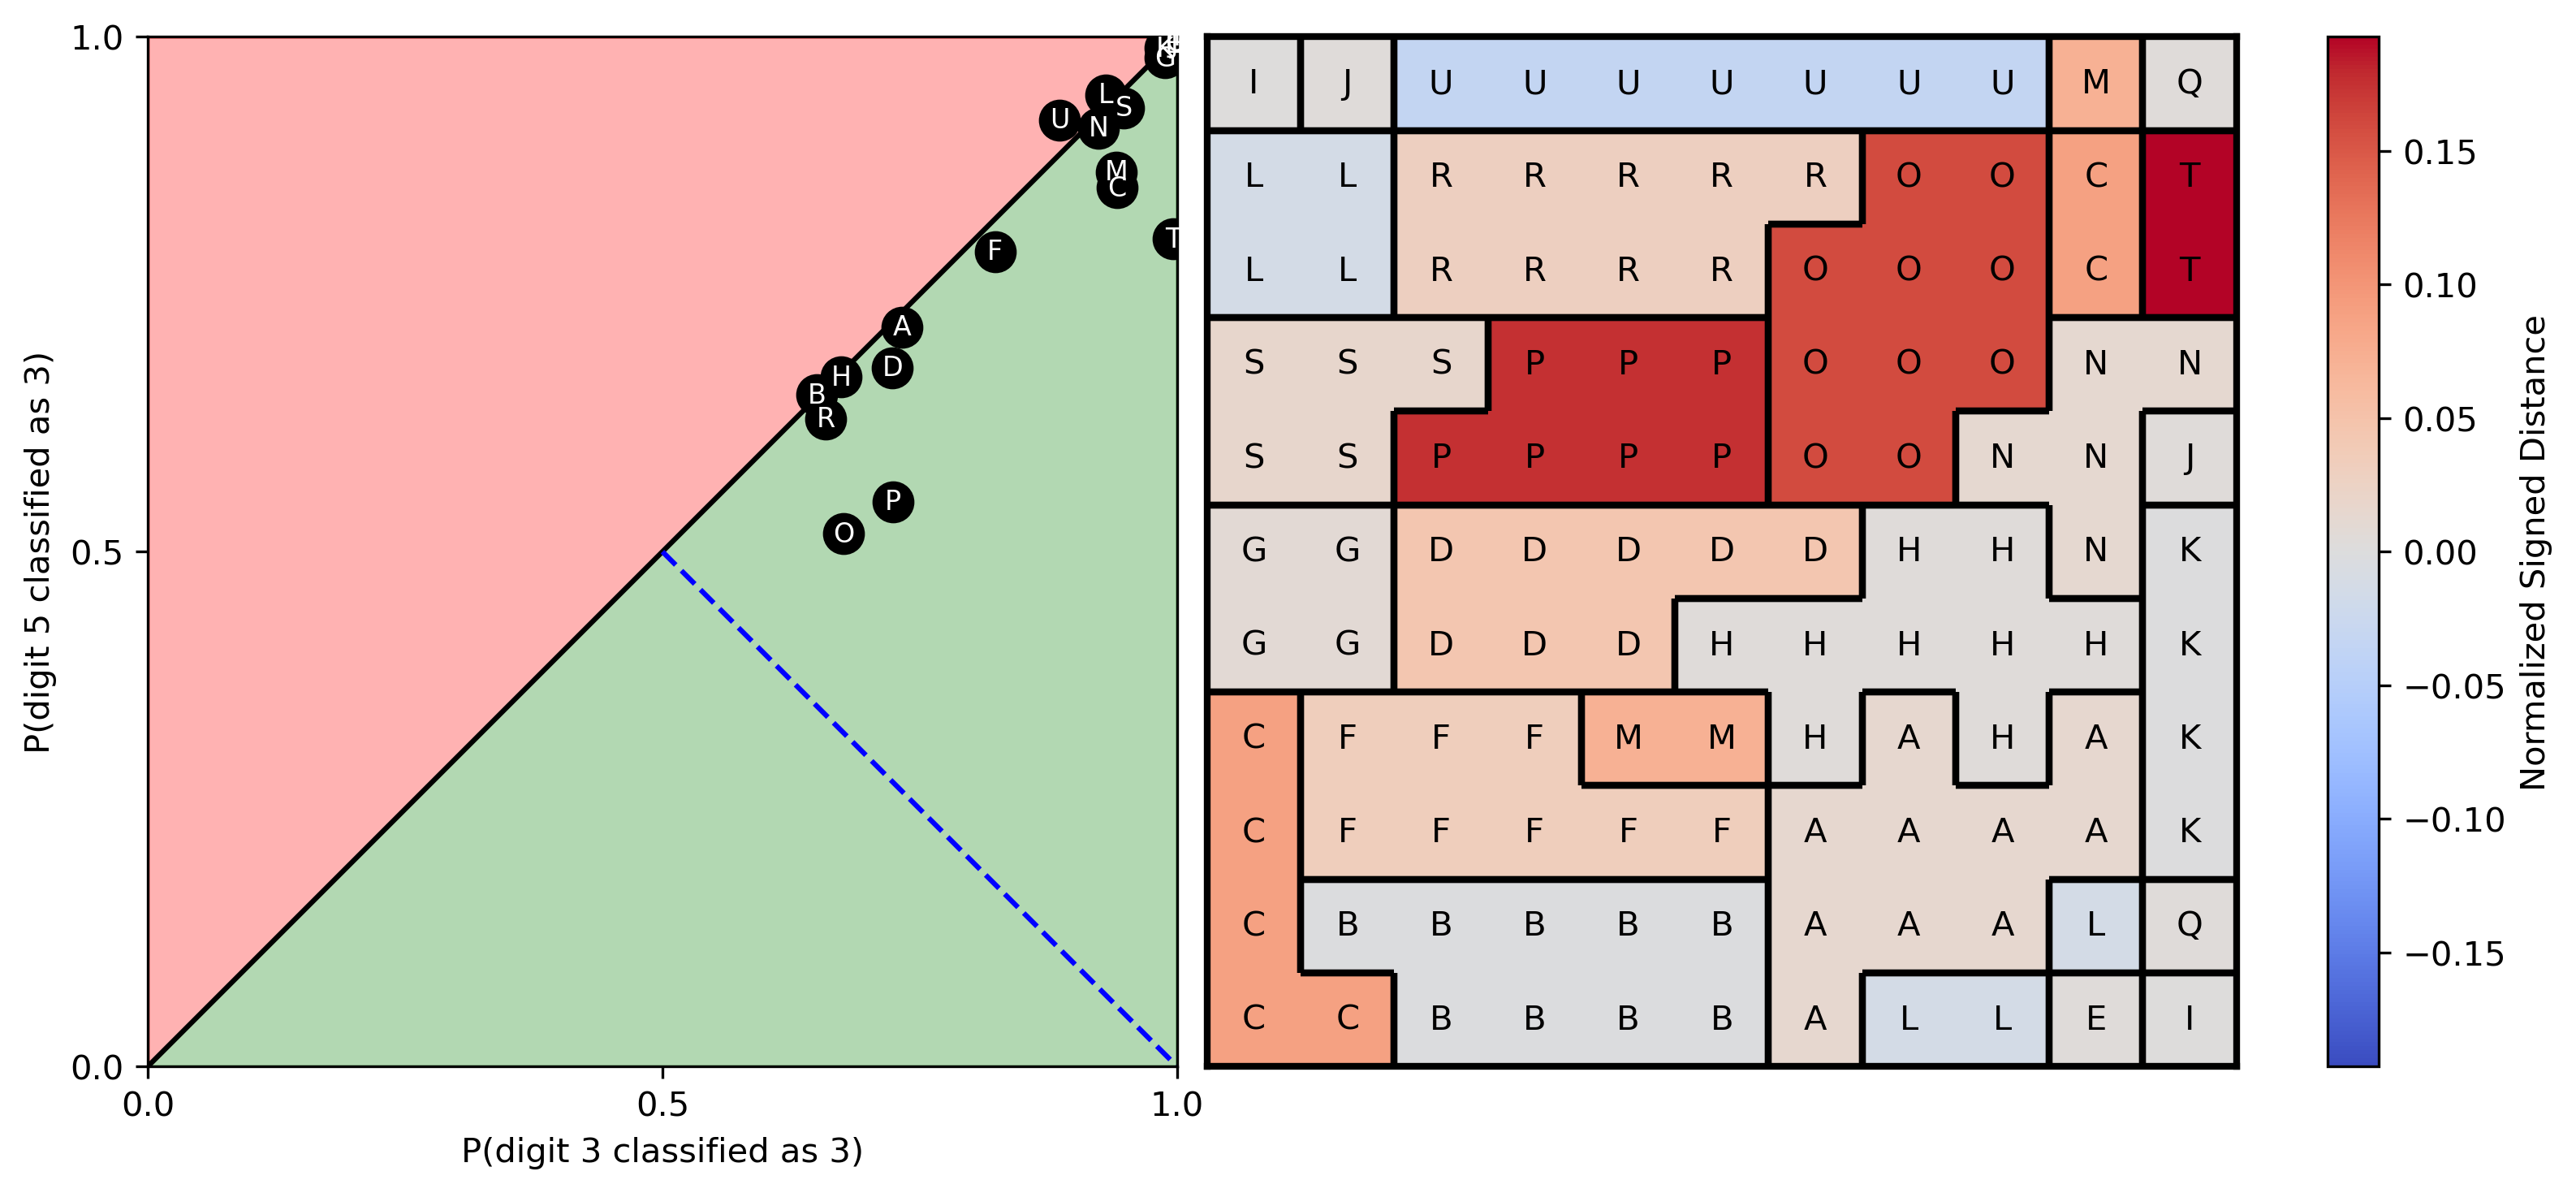

In [114]:


all_prob = test_all_C_icc/n_samples # for MCM 0
avg_prob = all_prob.mean(axis=1)
comms = myplot.generate_icc_comms_map(all_MCM[mcm_index])

avg_prob = utils.adjust_prob_icc_size(comms,avg_prob)


scale = 1
fig, axs  = plt.subplots(1,2,figsize=(12*scale,5*scale))
axs = axs.flatten()
axs[0].set_aspect('equal')
axs[0].set_xticks([0, 0.5, 1])
axs[0].set_yticks([0, 0.5, 1])
# axs[0].grid(True, linestyle='--', alpha=0.6)

# decision space
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)

axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')


# plots
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.max(axis=1), color="red", marker=".", label="worst digit") # extreme performnce
# axs[0].scatter(avg_prob[:, cat_a], avg_prob.min(axis=1), color="green", marker=".", label="best digit")

axs[0].scatter(avg_prob[:, cat_a], avg_prob[:, cat_b], color="black", marker="o", label=cat_b,s=130)

for i, (x, y) in enumerate(zip(avg_prob[:, cat_a], avg_prob[:, cat_b])):
    axs[0].text(x, y, myplot.int_to_letters(i), color="white", ha="center", va="center",fontsize=8)


# other stuff
# axs[0].set_xlabel(f'P(img = {cat_a} Is same as MCM{mcm_idx}|Digit {cat_a})')
# axs[0].set_xlabel(f"P(Img = {cat_a}| ICC X) for image digit {cat_a}")
axs[0].set_xlabel(f"P(digit {cat_a} classified as {cat_a})")
axs[0].set_ylabel(f"P(digit {cat_b} classified as {cat_a})")
# axs[0].set_ylabel(f"P({cat_b} is a {cat_a})")
# axs[0].set_xlabel(f"P({cat_a} is a {cat_a})")


# axs[0].set_ylabel(f"P(Img = {cat_a}| ICC X) for image digit {cat_b}")
# axs[0].set_title('Scatter Plot of state likelihoods for iccs in MCM 3')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

# axs[0].text(.012, .982, "worse than chance", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3)) # inside the plot
# axs[0].text(.989, .012, "better than chance", ha='right', va='bottom', bbox=dict(facecolor='white',alpha=.3))

# axs[0].text(.012, .982, "worse than chance", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))
# axs[0].text(.95, -.05, "better than chance", ha='right', va='bottom', bbox=dict(facecolor='white',alpha=.3))
# axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
# axs[0].legend(bbox_to_anchor=(.5, -0.2), loc='center', ncol=2)




# partition map for distances to decision bounary
plt.subplots_adjust(wspace=-.7)

axs[1].set_aspect('equal')
avg_prob
distances = utils.normalised_signed_distance_decisionbound(avg_prob, cat_a, cat_b)


dist_map = distances[comms]
im = myplot.partition_map(plt.gca(), dist_map,myplot.int_to_letters(comms),myplot.find_borders(comms), cbar=False)
plt.colorbar(im, ax=axs[1]).set_label('Normalized Signed Distance')
# plt.title("Normalized signed distance to decision boundary (3v5).", fontsize=11)



# axs[0].set_title(f"Mean probability over samples for each ICC")
# fig.suptitle(f"ICCs from MCM {cat_a} see test images of {(cat_a, cat_b)}")
plt.tight_layout()  


# CLelia
# upper right pixels are outside of the image, most black. As we go down diagnaolly get more center. Lower lit, larger.
# remove color points
# 3 has been seen, 5 has not been seen -> 5 is test data, 3 is train data


# digt 3 test vs. train in axis. Can Digithow much bias there is from smoothening. Appendix. WHy choose alhs.

##### For final plot

In [104]:
def adjust_prob_icc_size(comms, avg_prob): 
    # Adjust ICC probability by doing probabilities ^ 1/r

    icc_idx, icc_size = np.unique(comms, return_counts=True)
    return (avg_prob.T ** (1/icc_size)).T


icc_idx, icc_size = np.unique(comms, return_counts=True)
print(icc_idx,icc_size)
# avg_prob = adjust_prob_icc_size(comms,avg_prob)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] [ 7 10 10  2  8  9  2  3  3  3  2  2  4  5  3  2  3  2  3  4  2  1  2  6
  4  3  4  2  2  6  2]


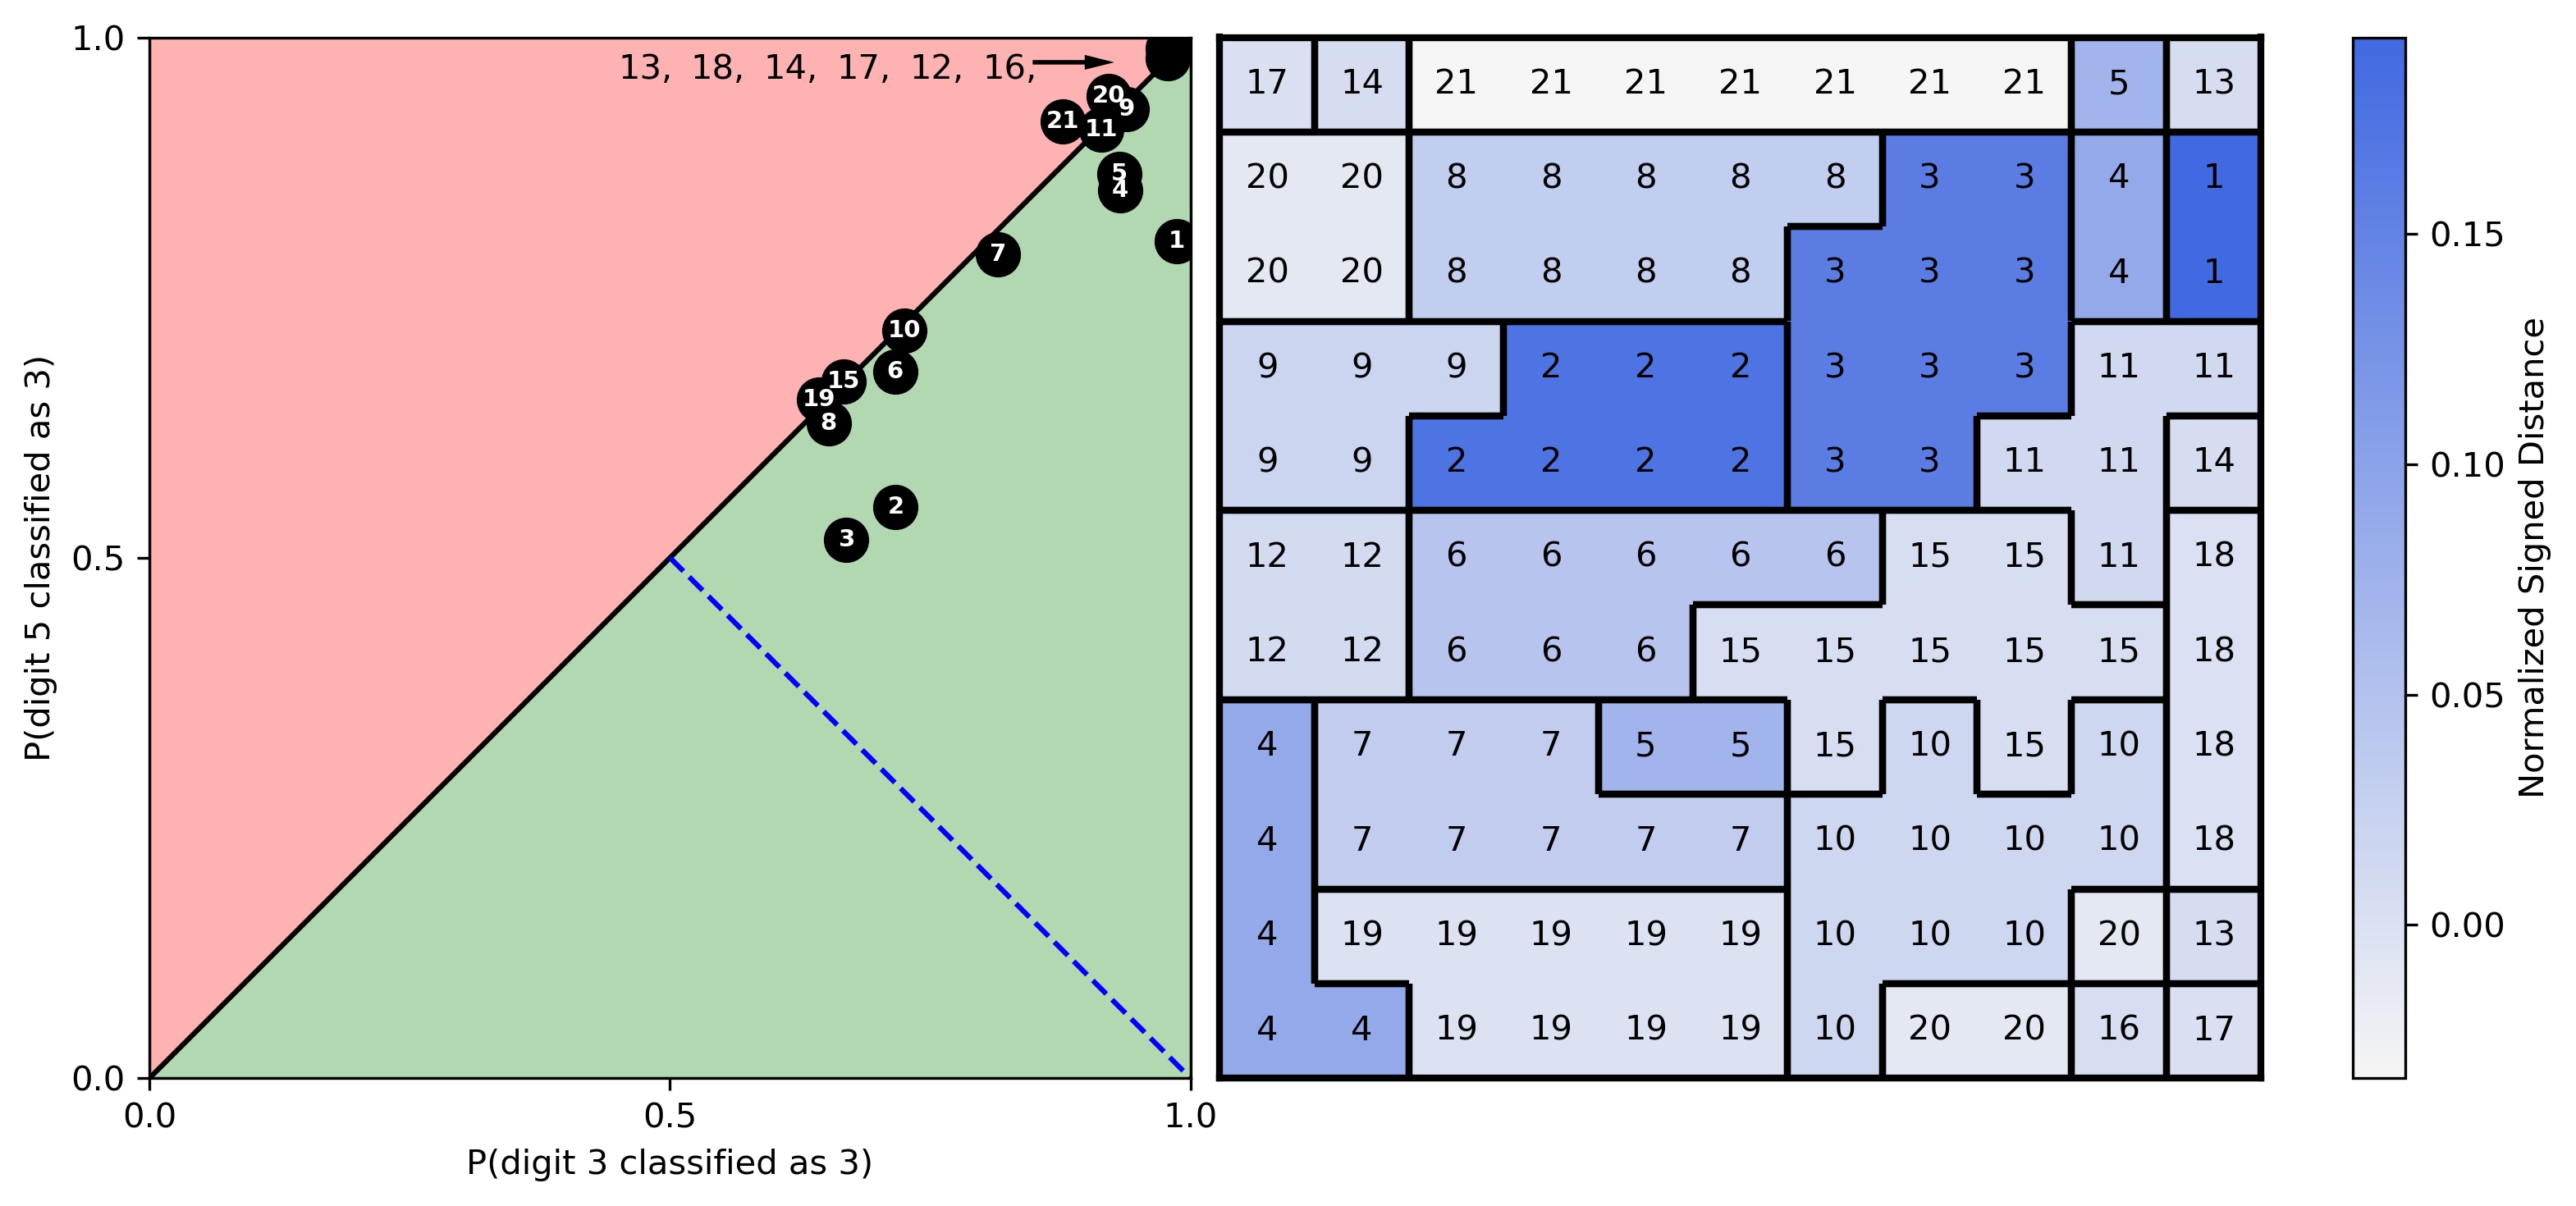

In [117]:
from scipy.stats import rankdata
import src.paper_utils as utils
importlib.reload(utils)

def adjust_prob_icc_size(comms, avg_prob): 
    # Adjust ICC probability by doing probabilities ^ 1/r

    icc_idx, icc_size = np.unique(comms, return_counts=True)
    return (avg_prob.T ** (1/icc_size)).T

mode = "rank" # or letter
scat_size = 110 if mode != "rank" else 150

all_prob = test_all_C_icc/n_samples # for MCM 0
avg_prob = all_prob.mean(axis=1)
avg_prob = adjust_prob_icc_size(comms,avg_prob)



comms = myplot.generate_icc_comms_map(all_MCM[mcm_index])
distances = utils.normalised_signed_distance_decisionbound(avg_prob, cat_a, cat_b)
dist_map = distances[comms]
ranks = rankdata(dist_map.max()-dist_map, method="dense").reshape(dist_map.shape)
letters = myplot.int_to_letters(comms)

#-----------
scale = 1
fig, axs  = plt.subplots(1,2,figsize=(12*scale,5*scale))
axs = axs.flatten()
# axs[0].set_xscale("log")
# axs[0].set_yscale("log")
axs[0].set_aspect('equal')
axs[0].set_xticks([0, 0.5, 1])
axs[0].set_yticks([0, 0.5, 1])

# axs[0].grid(True, linestyle='--', alpha=0.6)

# decision space
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')


axs[0].scatter(avg_prob[:, cat_a]*0.99, avg_prob[:, cat_b], color="black", marker="o", label=cat_b,s=scat_size)
# Labeling of scatter plot
left_side_y = .2  # for the bottom left corner
right_side_x = 1-0.2 # for the top right corner
any_bottomright = False
any_topleft = False
for i, (x, y) in enumerate(zip(avg_prob[:, cat_a], avg_prob[:, cat_b])):
    lab = myplot.int_to_letters(i)

    if mode == "rank":
        lab = ranks[letters == myplot.int_to_letters(i)][0]
    if x < 0.05 and y < 0.05:
        axs[0].text(0.01, left_side_y, f"{lab: >2},", color="black", transform=axs[0].transAxes, fontsize=10)
        left_side_y += 0.07
        any_bottomright = True
    elif x > 0.95 and y > 0.95:
        axs[0].text(right_side_x, 0.96, f"{lab: >2},", color="black", transform=axs[0].transAxes, fontsize=10)
        right_side_x -= 0.07
        any_topleft = True
    else:

        axs[0].text(x*0.99, y, lab, color="white", ha="center", va="center", fontsize=7, fontweight='bold')

if any_bottomright:
    axs[0].arrow(0.024, 0.18, 0, -0.05, head_width=0.01, head_length=0.02, fc='black', ec='black')
if any_topleft:
    axs[0].arrow(1-0.15, 1-0.024, 0.05, 0, head_width=0.01, head_length=0.02, fc='black', ec='black')

# for digit 1 only ------
# ymin, ymax = 0.7, 0.9
# x_min = 0.99
# y_data = avg_prob[:, cat_b]
# x_data = avg_prob[:, cat_a]
# # Find the indices of points that meet the criteria
# indices = np.where((y_data >= ymin) & (y_data <= ymax) & (x_data > x_min))[0]
# sorted_indices = indices[np.argsort(y_data[indices])]
# labs2 = [ranks[letters == myplot.int_to_letters(i)][0] for i in sorted_indices]

# for i, labi in enumerate(labs2):
#     axs[0].text(1-0.14-(0.07*(i+1)), 1*0.7, f"{labi: >2},", color="black", transform=axs[0].transAxes, fontsize=10)

# axs[0].arrow(1-0.14, 1*0.72, 0.05, 0.03, head_width=0.01, head_length=0.02, fc='black', ec='black')
# # ----------


# other stuff
axs[0].set_xlabel(f"P(digit {cat_a} classified as {cat_a})")
axs[0].set_ylabel(f"P(digit {cat_b} classified as {cat_a})")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

plt.subplots_adjust(wspace=-.7)
axs[1].set_aspect('equal')
cmap = myplot.cmap_to_gray("royalblue", reverse=True)


if mode == "rank":
    im = myplot.partition_map(plt.gca(), dist_map,ranks,myplot.find_borders(comms), cbar=False, normalise=False,cmap=cmap)
else:
    im = myplot.partition_map(plt.gca(), dist_map,myplot.int_to_letters(comms),myplot.find_borders(comms), cbar=False)



plt.colorbar(im, ax=axs[1]).set_label('Normalized Signed Distance')
plt.tight_layout()  
plt.savefig(f"./img/decisionboundary_and_map_{cat_a}{cat_b}.png", dpi=300, bbox_inches="tight")

In [45]:
# fig, axs  = plt.subplots(1,1,figsize=(10,10),dpi=100)
# axs = [axs]
# axs[0].scatter(avg_prob[:, cat_a], avg_prob[:, cat_b], color="black", marker="o", label=cat_b,s=scat_size)

# axs[0].set_xscale("log")
# axs[0].set_yscale("log")

# axs[0].plot([0, 1], [0, 1], color='black')
# axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
# axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
# axs[0].plot([0.5, 1], [0.5, 0], color='blue', linestyle='--')
# # axs[0].set_xlim(0, 1)
# # axs[0].set_ylim(0, 1)
# plt.show()

- add ROC, needs discrete votes but could add in text

## Probability distributions for informative vs. uninformative ICCs 
- (over samples for seeing 3 and seeing 5)
- 1x informative, 1x uninformative ICC


In [46]:
pdfs3 = test_all_C_icc[:,:,3]/n_samples
pdfs0 = test_all_C_icc[:,:,0]/n_samples

In [47]:
mpl.rcParams['figure.dpi'] = 100

In [55]:
myplot.int_to_letters(21)

array('V', dtype='<U1')

In [66]:

# letters = ["K","R"] # also not that bad a choice
letters = ["C","V"]


sel_icc = myplot.letters_to_int(letters)
pdfs_diff = (test_all_C_icc[sel_icc,:,3] - test_all_C_icc[sel_icc,:,5])/n_samples
pdfs3 = test_all_C_icc[sel_icc,:,3]/n_samples
pdfs5 = test_all_C_icc[sel_icc,:,5]/n_samples # NOTE, unsmoothed probability!



IndexError: index 21 is out of bounds for axis 0 with size 21

In [67]:
colors = ['#1f77b4', '#d62728']
cmap = sns.color_palette(colors)

In [68]:
print("\n Maybe have this as 3rd plot in scatter thing. \n Also, T>M>O>W by informativity here. \n")

df3 = pd.DataFrame(pdfs3.T, columns=letters)
df5 = pd.DataFrame(pdfs5.T, columns=letters)
# h = 5
# ratio  = 1.2
# fig, axs = plt.subplots(1, 2, figsize=(ratio*h*2, h))

# sns.histplot(df3, ax=axs[0], palette=cmap, stat="proportion",bins=20)
# sns.histplot(df5, ax=axs[1],palette=cmap,  stat="proportion",bins=20)
# # sns.histplot(df5-df3, ax=axs[1],palette="husl",  stat="proportion",bins=20)  # T and W look the same


# axs[0].set_title("Digit 3")
# axs[0].set_xlabel("Probability")
# axs[1].set_title("Digit 5")
# axs[1].set_xlabel("Probability")

# axs[0].legend(letters, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)
# axs[1].legend(letters, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

# plt.show()





 Maybe have this as 3rd plot in scatter thing. 
 Also, T>M>O>W by informativity here. 



In [69]:
def mirror_hist(ax, series1, series2, kwargs_up = {}, kwargs_down = {}, n_bins = 20, color="blue", label=None):
    # update default args
    kw_up = {"color":color,"alpha":.8}
    kw_up.update(kwargs_up)
    kw_down = {"color":color,"alpha":.5, "label":label}
    kw_down.update(kwargs_down)

    heights, bins = np.histogram(series1*-1, weights=np.ones(len(series1)) / len(series1), bins=n_bins) 
    bin_width = np.diff(bins)[0]
    bin_pos =( bins[:-1] + bin_width / 2) * -1
    ax.bar(bin_pos, heights, width=bin_width, **kw_up)
    ax.bar( bin_pos, heights, width=bin_width, color='none', edgecolor='black')


    # upside down plot
    heights, bins = np.histogram(series2*-1, weights=np.ones(len(series2)) / len(series2), bins=n_bins) 
    heights *= -1
    bin_width = np.diff(bins)[0]
    bin_pos =( bins[:-1] + bin_width / 2) * -1
    ax.bar(bin_pos, heights, width=bin_width, **kw_down)
    ax.bar( bin_pos, heights, width=bin_width, color='none', edgecolor='black')


# h = 5
# ratio  = 1.2
# cols = 1
# fig, axs = plt.subplots(1, cols, figsize=(ratio*h*cols, h))
# axs = [axs]


# mirror_hist(axs[0],df3[letters[0]], df5[letters[0]], color=colors[0], label =f"ICC {letters[0]}")
# mirror_hist(axs[0],df3[letters[1]], df5[letters[1]], color = colors[1], label = f"ICC {letters[1]}")
# axs[0].text(0.05, 0.9, "See 3", transform=axs[0].transAxes,bbox=dict(facecolor='white',alpha=.3))
# axs[0].text(0.05, 0.1, "See 5", transform=axs[0].transAxes,bbox=dict(facecolor='white',alpha=.3))

# axs[0].legend(loc="upper center")
# ticks =  axs[0].get_yticks()
# axs[0].set_yticklabels([abs(tick).round(2) for tick in ticks])
# plt.axhline(0,color="black", linewidth=2)

# plt.xlim((0,1))



# axs[0].set_ylabel("Proportion")
# axs[0].set_xlabel("Probability")
# axs[0].set_title(f"Probability distributions. Informative ICC {letters[0]} vs uninformative ICC {letters[1]}.")
# plt.show()


In [70]:
# # seperate the colours 



# h = 5
# ratio  = 1.2
# cols = 1
# fig, axs = plt.subplots(2, cols, figsize=(ratio*h*cols, h))


# plt.subplots_adjust(hspace=0.1)


# mirror_hist(axs[0],df3[letters[0]], df5[letters[0]], color=colors[0], label =f"ICC {letters[0]}",n_bins=80)
# mirror_hist(axs[1],df3[letters[1]], df5[letters[1]], color = colors[1], label = f"ICC {letters[1]}",n_bins=80)





# axs[0].set_xlabel("")
# axs[0].set_xticks([])
# axs[0].xaxis.set_visible(False)


# for ax in axs:
#     ax.set_xlim((0,1))
#     ax.set_ylim((-1,1))
#     ax.axhline(0,color="black", linewidth=2)

#     ax.text(.90, 0.55, "see 3", transform=ax.transAxes)
#     ax.text(.90, 0.40, "see 5", transform=ax.transAxes)
#     ax.legend(loc="upper center")
#     ticks =  ax.get_yticks()
#     ax.set_yticklabels([abs(tick).round(2) for tick in ticks])

# fig.supylabel("Fraction")
# fig.supxlabel("Probability")


# axs[0].set_title(f"Probability distributions. Informative ICC {letters[0]} vs uninformative ICC {letters[1]}.")
# plt.show()


/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_83417/3778803102.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([abs(tick).round(2) for tick in ticks])
/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_83417/3778803102.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([abs(tick).round(2) for tick in ticks])


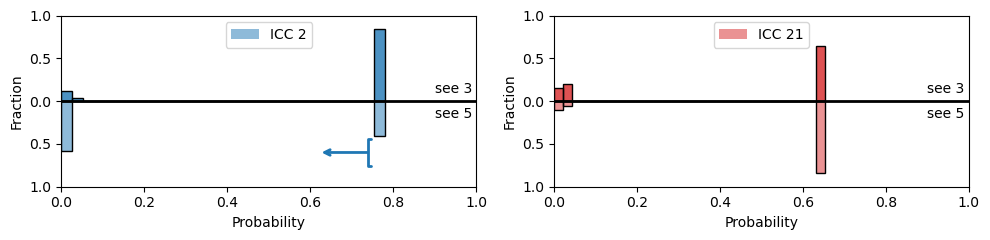

In [71]:

# ontop of each other
# h = 5
# ratio  = 1.5
# cols = 1
# scale = 1
# rows = 2


# next to each other
h = 5 
ratio  = 2
cols = 2
scale = .5
rows = 1


fig, axs = plt.subplots(rows, cols, figsize=(ratio*h*cols*scale, h*scale))
# fig, axs = plt.subplots(2, 1, figsize=(ratio*h*1*scale, h*scale))


# plt.subplots_adjust(hspace=0.1)


myplot.mirror_hist(axs[0],df3[letters[0]], df5[letters[0]], color=colors[0], label =f"ICC {sel_icc[0]}",n_bins=30) # use "letters" instead of sel_icc if want letters
myplot.mirror_hist(axs[1],df3[letters[1]], df5[letters[1]], color = colors[1], label = f"ICC {sel_icc[1]}",n_bins=30)
# axs[0].set_xlabel("")
# axs[0].set_xticks([])
# axs[0].xaxis.set_visible(False)


for ax in axs:
    ax.set_xlim((0,1))
    ax.set_ylim((-1,1))
    ax.axhline(0,color="black", linewidth=2)

    ax.text(.90, 0.55, "see 3", transform=ax.transAxes)
    ax.text(.90, 0.40, "see 5", transform=ax.transAxes)
    ax.legend(loc="upper center")
    ticks =  ax.get_yticks()
    ax.set_yticklabels([abs(tick).round(2) for tick in ticks])
    ax.set_ylabel("Fraction")
    ax.set_xlabel("Probability")

# add arrow

# axs[0].annotate("", xy=(.745, -.24), xytext=(.6, -.25),
#             arrowprops=dict(arrowstyle="<-["))
from matplotlib.patches import FancyArrowPatch

arrow = FancyArrowPatch((.62, -.6), (.745, -.6), arrowstyle="<-[", mutation_scale=10, lw=2, edgecolor=colors[0], )
axs[0].add_patch(arrow)
# axs[0].arrow(.754,  #x1
#          -.25,  # y1
#           .6-.754, # x2 - x1
#           0, # y2 - y1
#           facecolor="b",
#           edgecolor='k',
#           width=0.05,
#           head_width=.1, ,capstyle="projecting")
# fig.supylabel("Fraction")
# fig.supxlabel("Probability")


# axs[0].set_title(f"Probability distributions. Informative ICC {letters[0]} vs uninformative ICC {letters[1]}.")
plt.tight_layout()
plt.savefig(f"./img/mirror_hist{cat_a}{cat_b}.png", dpi=300, bbox_inches="tight")

# raise KeyboardInterrupt

In [72]:
# ICC1_prob_3_3 = pdfs3[0,:]
# ICC1_prob_3_5 = pdfs5[0,:]
# ICC2_prob_3_3 = pdfs3[-1,:]
# ICC2_prob_3_5 = pdfs5[-1,:]

# df = pd.DataFrame({
#     'ICC and Class': np.repeat(['ICC C (Digit 3)', 'ICC C (Digit 5)', 'ICC S (Digit 3)', 'ICC S (Digit 5)'], len(ICC1_prob_3_3)),
#     'P(Digit=3)': np.concatenate([ICC1_prob_3_3, ICC1_prob_3_5, ICC2_prob_3_3, ICC2_prob_3_5])
# })



# sns.violinplot(x='ICC and Class', y='P(Digit=3)', data=df, palette=cmap, inner='quartile', alpha=0.5)


# plt.xlabel('ICC and Class', fontsize=12)
# plt.ylabel('P(Digit=3)', fontsize=12)
# plt.title('Comparing Probability distributions for informative vs. uninformative iccs.', fontsize=14)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()



## Bias from smoothing.

In [ ]:
raise KeyboardInterrupt

KeyboardInterrupt: 

In [ ]:
# generate test counts
n_variables = 121
test_data_path = "../data/INPUT_all/data/testdata_separated"
test_data_filename_format = "test-images-unlabeled-{}.dat"
test_all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, test_data_path,test_data_filename_format)

In [ ]:
# all_C_icc_ = np.load(f"../data/OUTPUT/mcm/sample_sizes/{1000}/all_C_icc_{mcm_index}_run_{run_i}.npy")
all_C_icc_3 = np.load(f"../data/OUTPUT/mcm/sample_sizes/{5423}/all_C_icc_3.npy")

# assert all_C_icc.shape[1] ==n_samples, f"{all_C_icc.shape}"

In [ ]:
### Bias from smoothing. P(Is 3| Digit 3 Test) vs. P(Is 3| Digit 3 Train)

mcm_idx = 3
digit = 3
count = all_C_icc_3.shape[1] # since get counts, need to devide by max nr of count possible for both test and train data

# train data
all_prob = all_C_icc_3/count # for MCM 0
avg_prob = all_prob.mean(axis=1)
avg_train = avg_prob[:, digit]
# test data
test_all_prob = test_all_C_icc_3/count # for MCM 0
test_avg_prob = test_all_prob.mean(axis=1)
avg_test = test_avg_prob[:, digit]

test_sem = test_all_prob.std(axis=1)/np.sqrt(test_all_prob.shape[1])
train_sem = all_prob.std(axis=1)/np.sqrt(all_prob.shape[1])
test_sem = test_sem[:,digit]
train_sem = train_sem[:, digit]

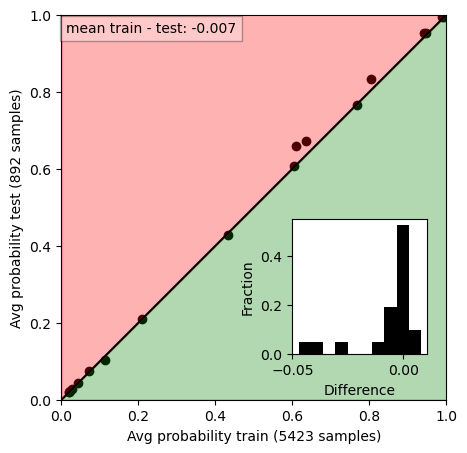

In [ ]:

scale = 1
fig, axs  = plt.subplots(1,1,figsize=(12*scale,5*scale))
axs = [axs]

axs[0].scatter(avg_train, avg_test, color="black", marker="o")


# other stuff
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
axs[0].fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
axs[0].text(.012, .982, f"mean train - test: {np.mean(avg_train - avg_test).round(3)}", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))

axs[0].set_xlabel(f"Avg probability train (5423 samples)")
axs[0].set_ylabel(f"Avg probability test (892 samples)")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[0].set_aspect('equal')

# axs[0].set_title(f"Effect of smoothing the probabilities. P(icc=3|see 3). Digit {digit}") # for clelia


ax_hist = axs[0].inset_axes([0.6, 0.12, 0.35, 0.35])  # Adjust the position and size as needed
ax_hist.hist((avg_train - avg_test), color="black", weights=np.ones(len(avg_test)) / len(avg_test))
ax_hist.set_xlabel('Difference')
ax_hist.set_ylabel("Fraction")

# ax_hist.set_yticks([0.1, .2,.3, .4])
ax_hist.set_xticks(np.round([-0.05, 0], 2))


# plt.show()
plt.savefig("./img/apx_smoothing_scatter.png", dpi=300, bbox_inches="tight")


In [ ]:
from matplotlib.ticker import MaxNLocator

<Figure size 640x480 with 0 Axes>

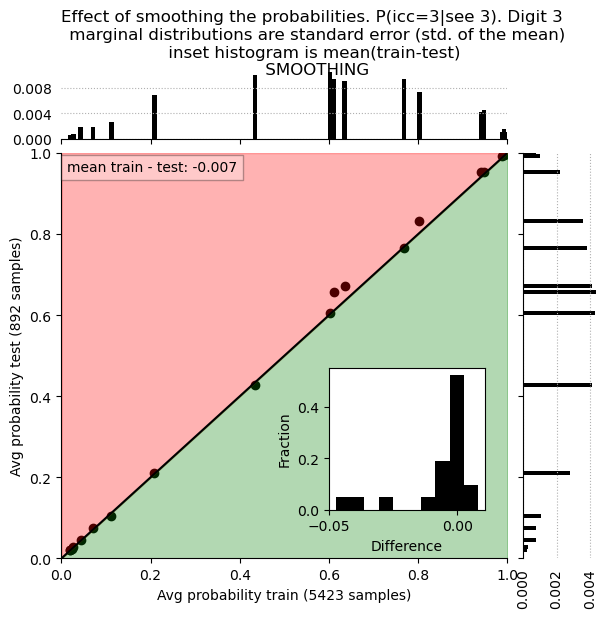

In [ ]:
fig = plt.figure()
g = sns.JointGrid(marginal_ticks=False)
x, y = avg_train, avg_test






g.ax_marg_x.bar(avg_train, test_sem, width=0.01, color="black")
g.ax_marg_y.barh(y = avg_test, height=0.01, width=train_sem, color="black")



# marginal distributions
g.ax_marg_y.tick_params(labelbottom=True, rotation=90)#, rotation=315)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_y.xaxis.set_major_locator(MaxNLocator(3))

g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_x.grid(True, axis='y', ls=':')
g.ax_marg_x.yaxis.set_major_locator(MaxNLocator(3))



# main plot/ scatter
g.ax_joint.scatter(avg_train, avg_test, color="black", marker="o")

g.ax_joint.plot([0, 1], [0, 1], color='black')
g.ax_joint.fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
g.ax_joint.fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
g.ax_joint.text(.012, .982, f"mean train - test: {np.mean(avg_train - avg_test).round(3)}", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))

g.ax_joint.set_xlabel(f"Avg probability train (5423 samples)")
g.ax_joint.set_ylabel(f"Avg probability test (892 samples)")
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(0, 1)



# inset histogram
ax_hist = g.ax_joint.inset_axes([0.6, 0.12, 0.35, 0.35])  # Adjust the position and size as needed
ax_hist.hist((avg_train - avg_test), color="black", weights=np.ones(len(avg_test)) / len(avg_test))
ax_hist.set_xlabel('Difference')
ax_hist.set_ylabel("Fraction")

# ax_hist.set_yticks([0.1, .2,.3, .4])
ax_hist.set_xticks(np.round([-0.05, 0], 2))

plt.suptitle(f"Effect of smoothing the probabilities. P(icc=3|see 3). Digit {digit} \n marginal distributions are standard error (std. of the mean)"+
             "\n inset histogram is mean(train-test) \n SMOOTHING")
plt.subplots_adjust(top=0.88)  # Adjust the value as needed


### Same thing now without smoothing

In [ ]:
# generate test counts

samples_path = "..data/OUTPUT/mcm/sample_sizes_nosmooth"
mcms_fname = "MCMs_0.json"
counts_fname = "Counts_0.json"
n_samples = 5423

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f)


n_variables = 121
test_data_path = "..data/INPUT_all/data/testdata_separated"
test_data_filename_format = "test-images-unlabeled-{}.dat"
test_all_C_icc_3_ns = myplot.calculate_P_icc(C, all_MCM,3,n_variables, test_data_path,test_data_filename_format)
all_C_icc_3_ns = np.load("../OUTPUT/sample_sizes_nosmooth/5423/all_C_icc_3.npy")



In [ ]:
n_variables = 121 #TODO This cell is not trash.
data_path = "..data/INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc_3_ns = myplot.calculate_P_icc(C, all_MCM,3,n_variables, data_path,data_filename_format)
np.save("../OUTPUT/sample_sizes_nosmooth/5423/all_C_icc_3.npy", all_C_icc_3)


KeyboardInterrupt: 

In [ ]:
all_C_icc_3_ns = np.load("../OUTPUT/sample_sizes_nosmooth/5423/all_C_icc_3_ns.npy")
# np.save("../OUTPUT/sample_sizes_nosmooth/5423/all_C_icc_3_ns.npy", all_C_icc_3)


In [ ]:
all_C_icc_3_ns.shape, test_all_C_icc_3_ns.shape

((21, 5423, 10), (23, 892, 10))

In [ ]:
### Bias from smoothing. P(Is 3| Digit 3 Test) vs. P(Is 3| Digit 3 Train)

mcm_idx = 3
digit = 3
count = all_C_icc_3_ns.shape[1] # since get counts, need to devide by max nr of count possible for both test and train data

# train data
all_prob = all_C_icc_3_ns/count # for MCM 0
avg_prob = all_prob.mean(axis=1)
avg_train = avg_prob[:, digit]
# test data
test_all_prob = test_all_C_icc_3_ns/count # for MCM 0
test_avg_prob = test_all_prob.mean(axis=1)
avg_test = test_avg_prob[:, digit]

test_sem = test_all_prob.std(axis=1)/np.sqrt(test_all_prob.shape[1])
train_sem = all_prob.std(axis=1)/np.sqrt(all_prob.shape[1])
test_sem = test_sem[:,digit]
train_sem = train_sem[:, digit]

In [ ]:
test_sem.shape

(23,)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (21,) and arg 1 with shape (23,).

<Figure size 640x480 with 0 Axes>

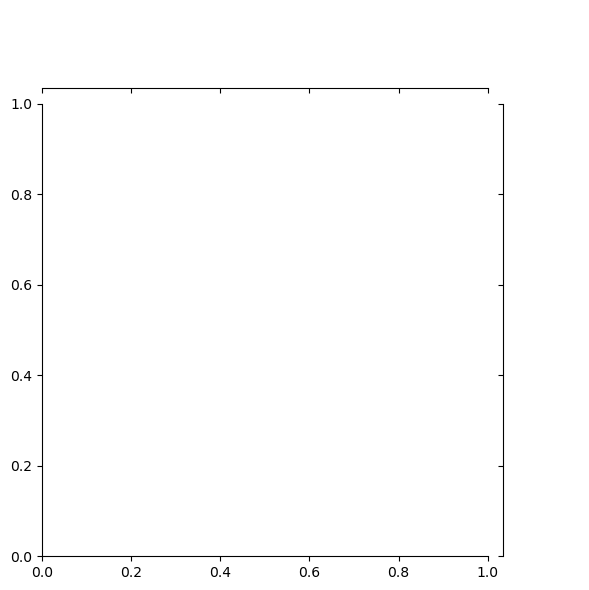

In [ ]:
fig = plt.figure()
g = sns.JointGrid(marginal_ticks=False)
x, y = avg_train, avg_test






g.ax_marg_x.bar(avg_train, test_sem, width=0.01, color="black")
g.ax_marg_y.barh(y = avg_test, height=0.01, width=train_sem, color="black")



# marginal distributions
g.ax_marg_y.tick_params(labelbottom=True, rotation=90)#, rotation=315)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_y.xaxis.set_major_locator(MaxNLocator(3))

g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_x.grid(True, axis='y', ls=':')
g.ax_marg_x.yaxis.set_major_locator(MaxNLocator(3))



# main plot/ scatter
g.ax_joint.scatter(avg_train, avg_test, color="black", marker="o")

g.ax_joint.plot([0, 1], [0, 1], color='black')
g.ax_joint.fill_between([0, 1], [0, 1], 1, where=[True, True], color='red', alpha=0.3)
g.ax_joint.fill_between([0, 1], [0, 1], 0, where=[True, True], color='green', alpha=0.3)
g.ax_joint.text(.012, .982, f"mean train - test: {np.mean(avg_train - avg_test).round(3)}", ha='left', va='top', bbox=dict(facecolor='white',alpha=.3))

g.ax_joint.set_xlabel(f"Avg probability train (5423 samples)")
g.ax_joint.set_ylabel(f"Avg probability test (892 samples)")
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(0, 1)



# inset histogram
ax_hist = g.ax_joint.inset_axes([0.6, 0.12, 0.35, 0.35])  # Adjust the position and size as needed
ax_hist.hist((avg_train - avg_test), color="black", weights=np.ones(len(avg_test)) / len(avg_test))
ax_hist.set_xlabel('Difference')
ax_hist.set_ylabel("Fraction")

# ax_hist.set_yticks([0.1, .2,.3, .4])
ax_hist.set_xticks(np.round([-0.05, 0], 2))

plt.suptitle(f"Effect of smoothing the probabilities. P(icc=3|see 3). Digit {digit} \n marginal distributions are standard error (std. of the mean)"+
             "\n inset histogram is mean(train-test)\n NO SMOOTHING")
plt.subplots_adjust(top=0.88)  # Adjust the value as needed


---------

Normalised distance to decision boundary comparing MCM 3 for seeing a 3 vs. seeing anything else (average)

Higher = more discriminatory 


Text(0.5, 1.0, 'Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.')

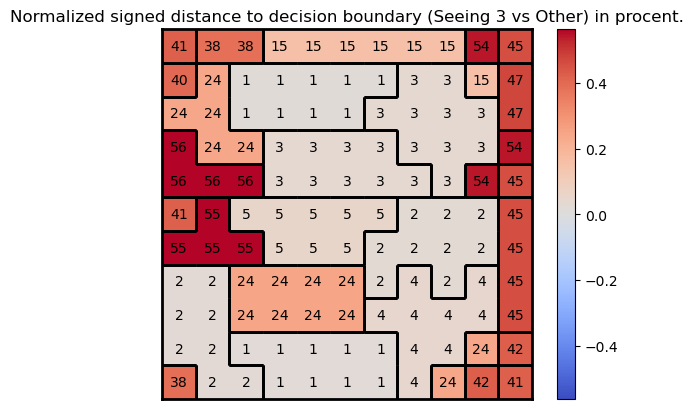

In [ ]:
x_coords, y_coords = zip(*[(x, y) for x, y in zip(avg_prob[:, cat_a], avg_prob.mean(axis=1))])
distances = np.array(x_coords) - np.array(y_coords) / np.sqrt(2)
x0, y0 = 0, 1
max_dist = np.abs(x0 - y0) / np.sqrt(2)


print("Higher = more discriminatory ")
comms3 = myplot.generate_icc_comms_map(all_MCM[3])
dist_map = distances[comms3]/max_dist
plt.figure()
myplot.partition_map(plt.gca(), dist_map,(dist_map*100).astype(int),myplot.find_borders(comms3))

plt.title("Normalized signed distance to decision boundary (Seeing 3 vs Other) in procent.")

In [ ]:
avg_prob = all_prob.mean(axis=1)
avg_prob.shape

(22, 10)

In [ ]:
raise KeyboardInterrupt

KeyboardInterrupt: 

--------------------

In [ ]:
# # make test data into seperate folder for this so the format matches the train data format
# data_path = "../INPUT_all/data/"

# data_filename_format = "test-images-unlabeled-{}.dat"

# test_data = np.loadtxt(data_path + "test-images-unlabeled-all-uniform.txt", dtype=str)
# test_labels = np.loadtxt(data_path + "test-labels-uniform.txt")

# for i in range(10):
#     cls = test_data[np.where(test_labels ==i)[0]]
#     np.savetxt(os.path.join(data_path,"testdata_separated",data_filename_format.format(i)), cls, delimiter="\n", fmt="%s")


In [ ]:

# pdfs3 = all_C_icc_3[:,:,3]/all_C_icc_3.shape[1]
# pdfs0 = all_C_icc_3[:,:,0]/all_C_icc_3.shape[1]


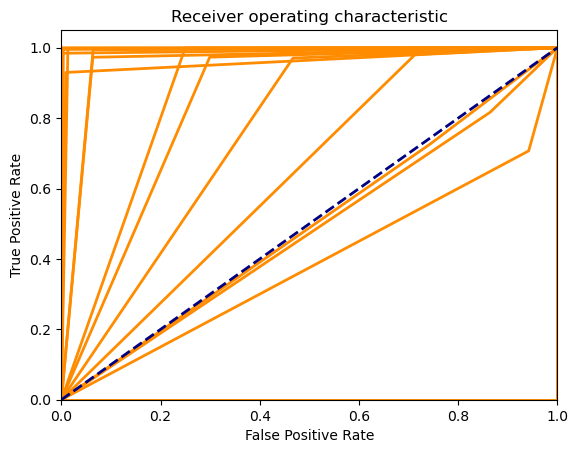

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.figure()


for i in range(23):
    pred1 = np.concatenate([pdfs3[i,:] > .5,pdfs0[i,:] <.5])
    lab1 = np.repeat([1,0],5423)

    # pred2 = np.concatenate([pdfs0[i,:] > .5,pdfs0[i,:] <.5])
    # lab2 = np.repeat([1,0],5423)

    # Compute ROC curve and ROC area for each class
    fpr1, tpr1, _ = roc_curve(lab1,pred1)
    roc_auc1 = auc(fpr1, tpr1)

    # fpr2, tpr2, _ = roc_curve(lab2,pred2)
    # roc_auc2 = auc(fpr2, tpr2)


    lw = 2
    plt.plot(fpr1, tpr1, color='darkorange',
            lw=lw, label='ICC 1 ROC curve (area = %0.2f)' % roc_auc1)
    # plt.plot(fpr2, tpr2, color='darkgreen',
    #         lw=lw, label='ICC 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
plt.show()